In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
#install Modules
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 56.8 MB/s 
     |████████████████████████████████| 981 kB 22.8 MB/s 
     |████████████████████████████████| 101 kB 11.6 MB/s 
     |████████████████████████████████| 788 kB 58.7 MB/s 
     |████████████████████████████████| 4.4 MB 29.6 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 42.8 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 199 kB 47.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 6.6 MB 36.2 MB/s 
     |████████████████████████████████| 596 kB 53.6 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=64202ed63cd2fc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
tweets = pd.read_json("/content/tweets.json")

ValueError: ignored

In [ ]:
tweets.head()


2013-07-18 09:39:46.071961602  \
tweet_author                                 Hematopoiesis News   
tweet_text    ⚕️ Scientists conducted a Phase II study of ac...   

                                  2013-07-17 03:40:32.173842437  \
tweet_author                                   Michael Wang, MD   
tweet_text    This phase 2 Acalabrutinib-Venetoclax (AV) tri...   

                                  2013-07-15 15:41:16.553048065  \
tweet_author                                        1stOncology   
tweet_text    #NICE backs #AstraZenecas #Calquence for #CLL ...   

                                  2013-07-12 19:19:42.367813635  \
tweet_author                                          Toby Eyre   
tweet_text    #acalabrutinib is a valuable option in pts int...   

                                  2013-07-04 12:40:34.334232586  \
tweet_author                                       Lymphoma Hub   
tweet_text    NICE has recommended the use of acalabrutinib ...   

                                  2013-07-04 08:44:42.278539265  \
tweet_author                                       David Ledger   
tweet_text    NICE backs AstraZeneca’s Calquence for CLL htt...   

                                  2013-07-04 04:22:03.305394179  \
tweet_author                               N Wales Cancer Forum   
tweet_text    This is England for now - these decisions usua...   

                                  2013-07-03 21:48:41.159868423  \
tweet_author                     European Pharmaceutical Review   
tweet_text    AstraZeneca’s Calquence (acalabrutinib), a che...   

                                  2013-07-03 15:55:15.081797632  \
tweet_author                                     Graham Collins   
tweet_text    Superstar @tobyeyre82 responding to the excell...   

                                  2013-07-03 04:25:53.837944834  ...  \
tweet_author                                        CLL Ireland  ...   
tweet_text    CLL patients all know the drug Ibrutinib and y...  ...   

                                  1987-06-22 19:36:28.372967425  \
tweet_author                                          C A R E N   
tweet_text    I miss them! 😋😆😅\n\n#FotoRus #FriendshipForeve...   

                                  1987-06-22 13:38:05.220745216  \
tweet_author                                    Werneth Cricket   
tweet_text    The fixtures are out, first team will travel t...   

                                  1987-06-20 01:14:46.517178368  \
tweet_author                                John P. Leonard, MD   
tweet_text    Partnering @GileadSciences &amp;Ono BTKi-combo...   

                                  1987-06-19 13:30:22.587748353  \
tweet_author                                 Joy is a Lifestyle   
tweet_text    Hanging out with Friends! :) #FF #CLL #Happine...   

                                  1987-06-19 13:03:48.404117505  \
tweet_author                                         Micheál 🇮🇪   
tweet_text    What I'd do to go to Gerrard's last game at An...   

                                  1987-06-19 12:17:53.643945985  \
tweet_author                                 Joy is a Lifestyle   
tweet_text    Hanging out with Friends! :) #FF #CLL #Happine...   

                                  1987-06-19 12:06:26.675290112  \
tweet_author                                      𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹   
tweet_text    Hanging out with Friends! :) #FF #CLL #Happine...   

                                  1987-06-17 23:05:41.186953217  \
tweet_author                                              IQWiG   
tweet_text    Zusatznutzen von #Idelalisib ist weder für #CL...   

                                  1987-06-17 15:18:00.525635584  \
tweet_author                                          Medibooks   
tweet_text    #Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...   

                                  1987-06-13 10:44:06.537678849  
tweet_author                                          Medibooks  
tweet_text    #Hematología MUTATIONS IN TLR/MYD88

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, tweet_author to tweet_text
Columns: 43347 entries, 2013-07-18 09:39:46.071961602 to 1987-06-13 10:44:06.537678849
dtypes: object(43347)
memory usage: 677.3+ KB


In [ ]:
tweets.head(~1)

Empty DataFrame
Columns: [2013-07-18 09:39:46.071961602, 2013-07-17 03:40:32.173842437, 2013-07-15 15:41:16.553048065, 2013-07-12 19:19:42.367813635, 2013-07-04 12:40:34.334232586, 2013-07-04 08:44:42.278539265, 2013-07-04 04:22:03.305394179, 2013-07-03 21:48:41.159868423, 2013-07-03 15:55:15.081797632, 2013-07-03 04:25:53.837944834, 2013-07-02 18:11:16.191608837, 2013-07-01 07:14:41.230188555, 2013-06-30 09:05:12.723533827, 2013-06-30 02:16:00.543047693, 2013-06-29 23:37:09.767299076, 2013-06-29 18:05:09.805510658, 2013-06-29 18:03:05.691746305, 2013-06-29 17:48:21.335265284, 2013-06-29 17:20:40.680333314, 2013-06-29 15:21:31.635998731, 2013-06-29 14:22:51.205742604, 2013-06-29 12:58:51.795492867, 2013-06-29 07:20:42.911141897, 2013-06-29 03:15:56.845137920, 2013-06-29 02:33:48.938084360, 2013-06-29 02:31:49.287215104, 2013-06-28 19:30:09.467777025, 2013-06-26 09:56:28.527968259, 2013-06-22 06:53:24.950089733, 2013-06-16 16:04:03.236925441, 2013-05-31 18:49:40.603117580, 2013-05-06 00:46:39.638896640, 2013-05-01 20:36:49.896710145, 2013-04-24 02:23:51.289536522, 2013-04-12 08:37:10.574977026, 2013-04-08 19:30:41.398915076, 2013-03-28 17:31:00.954259459, 2013-03-26 13:25:15.838582793, 2013-03-26 12:59:44.938475521, 2013-03-25 05:38:48.133976069, 2013-03-25 00:01:02.267682820, 2013-03-23 06:14:35.279654912, 2013-03-16 17:43:39.493310464, 2013-03-08 08:05:02.856941568, 2013-03-08 07:17:53.329131520, 2013-02-25 20:04:43.227389957, 2013-02-11 17:49:01.971316737, 2013-02-10 13:54:30.883475456, 2013-02-09 02:51:12.148815874, 2013-02-08 10:36:05.252886533, 2013-02-03 09:32:01.979244551, 2013-01-29 23:43:40.694798338, 2013-01-23 10:32:04.423290884, 2013-01-22 07:46:44.928876545, 2013-01-14 16:55:33.498871808, 2013-01-13 14:56:41.689702401, 2013-01-05 05:06:16.916545538, 2013-01-05 03:27:13.310965761, 2013-01-01 16:09:04.454676489, 2012-12-31 10:46:16.388739073, 2012-12-26 04:53:40.923998214, 2012-12-20 04:58:26.071330819, 2012-12-16 05:49:14.474426374, 2012-12-15 06:36:43.645136897, 2012-12-10 16:09:01.980708864, 2012-12-09 01:50:52.793856003, 2012-12-07 11:01:22.621071361, 2012-12-07 00:55:08.723392519, 2012-12-03 13:44:01.210101763, 2012-12-03 12:19:47.526717445, 2012-12-03 12:19:33.362597892, 2012-12-03 11:38:27.250290689, 2012-12-03 10:55:37.559617536, 2012-12-02 18:54:48.709181441, 2012-12-02 04:38:15.872917504, 2012-11-30 01:24:57.466687495, 2012-11-30 00:42:03.413934084, 2012-11-29 23:23:28.223514624, 2012-11-29 02:12:06.689308673, 2012-11-28 20:42:33.028997121, 2012-11-28 16:31:56.348465160, 2012-11-28 05:56:52.010979330, 2012-11-28 05:50:26.583830530, 2012-11-28 03:20:53.101084675, 2012-11-28 01:57:00.049539074, 2012-11-28 01:39:24.825559042, 2012-11-27 20:21:44.561758208, 2012-11-27 15:46:21.269000192, 2012-11-27 13:05:32.763185152, 2012-11-27 08:56:30.479855617, 2012-11-27 04:11:55.992395776, 2012-11-27 03:17:55.477315585, 2012-11-27 03:14:03.012374530, 2012-11-27 03:12:56.792608768, 2012-11-27 03:04:03.113664512, 2012-11-26 09:17:40.171984896, 2012-11-26 07:14:34.472583169, 2012-11-25 23:16:09.675223045, 2012-11-25 21:10:18.380152832, 2012-11-25 09:49:12.085258241, ...]
Index: []

[0 rows x 43347 columns]

In [ ]:
tweet= tweets.T
tweet

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   
...                                           ...   
1987-06-19 12:17:53.643945985  Joy is a Lifestyle   
1987-06-19 12:06:26.675290112       𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹   
1987-06-17 23:05:41.186953217               IQWiG   
1987-06-17 15:18:00.525635584           Medibooks   
1987-06-13 10:44:06.537678849           Medibooks   

                                                                      tweet_text  
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...  
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...  
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...  
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...  
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...  
...                                                                          ...  
1987-06-19 12:17:53.643945985  Hanging out with Friends! :) #FF #CLL #Happine...  
1987-06-19 12:06:26.675290112  Hanging out with Friends! :) #FF #CLL #Happine...  
1987-06-17 23:05:41.186953217  Zusatznutzen von #Idelalisib ist weder für #CL...  
1987-06-17 15:18:00.525635584  #Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...  
1987-06-13 10:44:06.537678849  #Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...  

[43347 rows x 2 columns]

In [ ]:
#pre process data
#define function
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern, input_txt)
  for word in r:
    input_txt= re.sub(word,"",input_txt)
    return input_txt

In [ ]:
tweet.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...  
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...  
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...  
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...  
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...

In [ ]:
tweet['clean_tweet']= np.vectorize(remove_pattern)(tweet['tweet_text'],"#*")
tweet.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  \
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...   
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...   
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...   
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...   

                                                                     clean_tweet  
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...  
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...  
2013-07-15 15:41:16.553048065  NICE backs AstraZenecas Calquence for CLL http...  
2013-07-12 19:19:42.367813635  acalabrutinib is a valuable option in pts into...  
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...

In [ ]:
#remove special characters,numbers, punctuations
tweet['clean_tweet']=tweet['clean_tweet'].str.replace("[^a-zA-Z]"," ")
tweet.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  \
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...   
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...   
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...   
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...   

                                                                     clean_tweet  
2013-07-18 09:39:46.071961602     Scientists conducted a Phase II study of ac...  
2013-07-17 03:40:32.173842437  This phase   Acalabrutinib Venetoclax  AV  tri...  
2013-07-15 15:41:16.553048065  NICE backs AstraZenecas Calquence for CLL http...  
2013-07-12 19:19:42.367813635  acalabrutinib is a valuable option in pts into...  
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...

In [ ]:
#remove short words
tweet['clean_tweet']= tweet['clean_tweet'].apply(lambda x: " " .join([w for w in x.split() if len(w)>3]))
tweet.head()

tweet_author  \
2013-07-18 09:39:46.071961602  Hematopoiesis News   
2013-07-17 03:40:32.173842437    Michael Wang, MD   
2013-07-15 15:41:16.553048065         1stOncology   
2013-07-12 19:19:42.367813635           Toby Eyre   
2013-07-04 12:40:34.334232586        Lymphoma Hub   

                                                                      tweet_text  \
2013-07-18 09:39:46.071961602  ⚕️ Scientists conducted a Phase II study of ac...   
2013-07-17 03:40:32.173842437  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2013-07-15 15:41:16.553048065  #NICE backs #AstraZenecas #Calquence for #CLL ...   
2013-07-12 19:19:42.367813635  #acalabrutinib is a valuable option in pts int...   
2013-07-04 12:40:34.334232586  NICE has recommended the use of acalabrutinib ...   

                                                                     clean_tweet  
2013-07-18 09:39:46.071961602  Scientists conducted Phase study acalabrutinib...  
2013-07-17 03:40:32.173842437  This phase Acalabrutinib Venetoclax trial that...  
2013-07-15 15:41:16.553048065    NICE backs AstraZenecas Calquence https lPDoGrA  
2013-07-12 19:19:42.367813635  acalabrutinib valuable option intolerant ibrut...  
2013-07-04 12:40:34.334232586  NICE recommended acalabrutinib patients with t...

In [ ]:
tweet.clean_tweet[1]

'This phase Acalabrutinib Venetoclax trial that still recruitment phase will study well venetoclax acalabrutinib works patients either relapsed respondent initial therapy https'

In [ ]:
tweet.tweet_text[1]

'This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N'

In [ ]:
tweet['clean_tweet'] = tweet['clean_tweet'].str.replace("https*"," ")

In [ ]:
tweet.clean_tweet[1]

'This phase Acalabrutinib Venetoclax trial that still recruitment phase will study well venetoclax acalabrutinib works patients either relapsed respondent initial therapy  '

In [ ]:
#tokenize
tokenized_tweet = tweet['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

2013-07-18 09:39:46.071961602    [Scientists, conducted, Phase, study, acalabru...
2013-07-17 03:40:32.173842437    [This, phase, Acalabrutinib, Venetoclax, trial...
2013-07-15 15:41:16.553048065      [NICE, backs, AstraZenecas, Calquence, lPDoGrA]
2013-07-12 19:19:42.367813635    [acalabrutinib, valuable, option, intolerant, ...
2013-07-04 12:40:34.334232586    [NICE, recommended, acalabrutinib, patients, w...
Name: clean_tweet, dtype: object

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence : [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

2013-07-18 09:39:46.071961602    [scientist, conduct, phase, studi, acalabrutin...
2013-07-17 03:40:32.173842437    [thi, phase, acalabrutinib, venetoclax, trial,...
2013-07-15 15:41:16.553048065         [nice, back, astrazeneca, calquenc, lpdogra]
2013-07-12 19:19:42.367813635    [acalabrutinib, valuabl, option, intoler, ibru...
2013-07-04 12:40:34.334232586    [nice, recommend, acalabrutinib, patient, with...
Name: clean_tweet, dtype: object

In [ ]:
#combine to single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]= " ".join(tokenized_tweet[i])
tweet['clean_tweet']= tokenized_tweet
tweet.head()

NameError: ignored

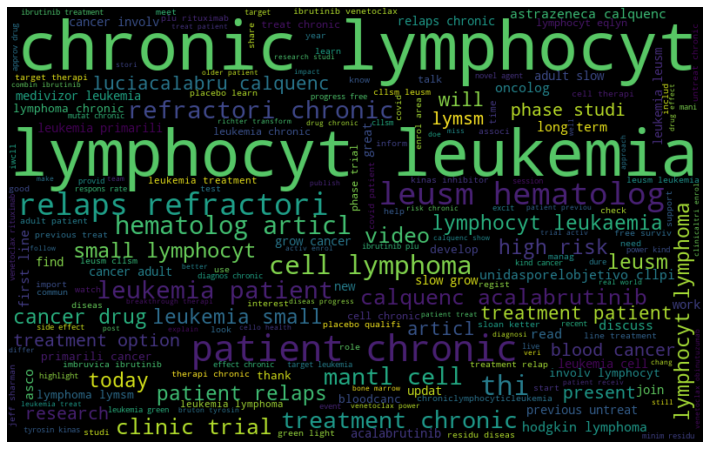

In [ ]:
#visulize the frequent words
all_words = " ".join([sentence for sentence in tweet['clean_tweet']])
from wordcloud import WordCloud 
wordcloud= WordCloud(width=800,height=500,random_state = 42, max_font_size=100).generate(all_words)


#plot 
plt.figure(figsize=(15,8))
plt.imshow (wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words

'scientist conduct phase studi acalabrutinib patient with relaps refractori were ibrutinib intoler found overal respons rate kuzz thi phase acalabrutinib venetoclax trial that still recruit phase will studi well venetoclax acalabrutinib work patient either relaps respond initi therapi nice back astrazeneca calquenc lpdogra acalabrutinib valuabl option intoler ibrutinib further valuabl data help decis make earli view haematologica kclzax nice recommend acalabrutinib patient with treatment chronic lymphocyt leukemia find more here oujptlcin lymsm lymphoma nice back astrazeneca calquenc jopnlnid thi england these decis usual come wale more info zshh ofdwedlav astrazeneca calquenc acalabrutinib chemotherapi free monotherapi will offer patient with chronic lymphocyt leukaemia oncolog drugapprov pharma healthnew find more here qyuft sxve nggx superstar tobyeyr respond excel news nice approv acalabrutinib frontlin unsuit patient lacvpotrwx patient know drug ibrutinib yesterday acalabrutinib a

In [ ]:
def convert (wrds):
  return (wrds.split())
entity=convert(all_words)

In [ ]:
#To find the frequency
frequency = nltk.FreqDist(entity)
d = pd.DataFrame({'entity': list(frequency.keys()),
                  'frequency' : list(frequency.values())})
d.head(100)

entity  frequency
0        scientist         76
1          conduct         31
2            phase       1658
3            studi       2571
4    acalabrutinib       3804
..             ...        ...
95  bloodcancerirl         19
96            murr          1
97           kphsz          1
98           optim        148
99           manag        636

[100 rows x 2 columns]

In [ ]:
frequency

FreqDist({'scientist': 76,
          'conduct': 31,
          'phase': 1658,
          'studi': 2571,
          'acalabrutinib': 3804,
          'patient': 10042,
          'with': 12420,
          'relaps': 2631,
          'refractori': 1599,
          'were': 217,
          'ibrutinib': 4145,
          'intoler': 121,
          'found': 219,
          'overal': 174,
          'respons': 941,
          'rate': 513,
          'kuzz': 1,
          'thi': 2271,
          'venetoclax': 2673,
          'trial': 2770,
          'that': 1551,
          'still': 254,
          'recruit': 96,
          'will': 932,
          'well': 334,
          'work': 650,
          'either': 46,
          'respond': 93,
          'initi': 331,
          'therapi': 2845,
          'nice': 181,
          'back': 182,
          'astrazeneca': 1485,
          'calquenc': 2832,
          'lpdogra': 1,
          'valuabl': 21,
          'option': 975,
          'further': 57,
          'data': 1559,
          '

In [ ]:
tweet['clean_tweet']

2013-07-18 09:39:46.071961602    scientist conduct phase studi acalabrutinib pa...
2013-07-17 03:40:32.173842437    thi phase acalabrutinib venetoclax trial that ...
2013-07-15 15:41:16.553048065               nice back astrazeneca calquenc lpdogra
2013-07-12 19:19:42.367813635    acalabrutinib valuabl option intoler ibrutinib...
2013-07-04 12:40:34.334232586    nice recommend acalabrutinib patient with trea...
                                                       ...                        
1987-06-19 12:17:53.643945985                        hang with friend happi pdleww
1987-06-19 12:06:26.675290112                     hang with friend happi gynchdnul
1987-06-17 23:05:41.186953217    zusatznutzen idelalisib weder noch refrakt fol...
1987-06-17 15:18:00.525635584    hematolog express immunochemotherapi outcom ch...
1987-06-13 10:44:06.537678849    hematolog mutat pathway identifi subset young ...
Name: clean_tweet, Length: 43347, dtype: object

In [ ]:
#To find the frequency
frequencya = nltk.FreqDist(tweet['clean_tweet'])
ds = pd.DataFrame({'entity': list(frequencya.keys()),
                  'frequency' : list(frequencya.values())})
ds.head(100)

entity  frequency
0   scientist conduct phase studi acalabrutinib pa...          1
1   thi phase acalabrutinib venetoclax trial that ...          1
2              nice back astrazeneca calquenc lpdogra          1
3   acalabrutinib valuabl option intoler ibrutinib...          1
4   nice recommend acalabrutinib patient with trea...          1
..                                                ...        ...
95  astrazeneca tout calquenc safeti against imbru...          1
96  monday quick take includ comirnati provision a...          1
97  three year after first launch calquenc second ...          1
98  astrazeneca with data claim leukemia drug safe...          1
99  acalabrutinib approv japan relaps refractori l...          1

[100 rows x 2 columns]

In [ ]:
#import Modules

from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
#create sentiment analysis function
classifier = TextClassifier.load('en-sentiment')
def get_sentiment(twts):
  sentence = Sentence(twts)
  classifier.predict(sentence)
  return str(sentence.labels[0]).split()[-2:]


2022-07-23 13:33:21,024 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpekbniqqy


100%|██████████| 265512723/265512723 [00:11<00:00, 23462368.29B/s]

2022-07-23 13:33:32,712 copying /tmp/tmpekbniqqy to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-07-23 13:33:33,314 removing temp file /tmp/tmpekbniqqy
2022-07-23 13:33:33,357 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
get_sentiment(all_words)

['POSITIVE', '(0.9501)']